In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm      
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
import pandas as pd
zps = {'F115W':1587, 'F150W':1074, 'F210M':653,'F277W':427, 'F380M':253, 'F430M':194, 'F480M':150, 'F1000W': 34.9,'F1500W':18,'F2100W':8}

In [2]:
instru = 'miri'
datasets = []
for casedir in ['5', '1', '2','0']:
    for inc in ['0','30','60']:
        tablename = f'data{casedir}_inc{inc}'
        data = pd.read_csv(f"flux_tables/table_{instru}{casedir}_inc{inc}_pipl.csv")
        data = data.rename(columns={"CPD-bg":"flux1","antiCPD-bg":"flux1anti","mag CPD-antiCPD": "mag2", "mag CPD-bg": "mag1"})
        for col in ['mag1','mag2','SNR_CPD']:
            data[col] = pd.to_numeric(data[col],errors='coerce')
        # add a mag1anti column
        mag1anti =  [2.5 * np.log10(zps[data['filter'][i]]/data['flux1anti'][i]) for i in range(len(data))]
        data['mag1anti'] = mag1anti
        exec(f'{tablename} = data')
        exec(f'datasets.append({tablename})')
        
data0_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,F1000W,0.000097,0.000056,0.000040,0.000039,1.080000e-06,14.84,18.78,1.03,nondetect,14.873848
1,10jup50au,F1500W,0.000721,0.000549,0.000172,0.000128,4.400000e-05,12.55,14.03,1.35,asymm,12.870156
2,10jup50au,F2100W,0.015300,0.013600,0.001750,0.001350,4.050000e-04,9.15,10.74,1.30,asymm,9.431891
3,5jup50au,F1000W,0.000098,0.000056,0.000042,0.000040,2.090000e-06,14.79,18.06,1.05,nondetect,14.849203
4,5jup50au,F1500W,0.000683,0.000564,0.000119,0.000109,1.010000e-05,12.95,15.63,1.09,nondetect,13.044615
5,5jup50au,F2100W,0.014900,0.013500,0.001430,0.001390,4.590000e-05,9.37,13.10,1.03,nondetect,9.400188
6,1jup50au,F1000W,0.000099,0.000063,0.000036,0.000034,2.030000e-06,14.96,18.09,1.06,nondetect,15.028366
7,1jup50au,F1500W,0.000668,0.000583,0.000086,0.000079,6.460000e-06,13.31,16.11,1.08,nondetect,13.392740
8,1jup50au,F2100W,0.014800,0.013500,0.001310,0.001270,3.930000e-05,9.46,13.27,1.03,nondetect,9.498216
9,1sat50au,F1000W,0.000100,0.000055,0.000045,0.000042,2.640000e-06,14.73,17.80,1.06,nondetect,14.793782


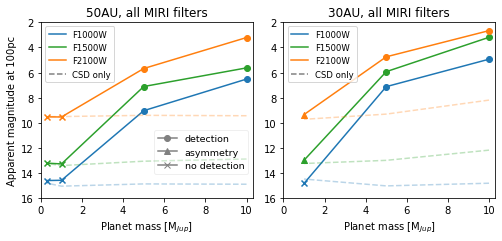

In [8]:
# mass vs mag, diff filters
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.mag1[i:12+i:3].values, data0_inc0.mag1anti[i:12+i:3], data5_inc0.flag[i:12+i:3].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.mag1[12+i::3].values, data0_inc0.mag1anti[12+i::3], data5_inc0.flag[12+i::3].values
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all MIRI filters')
    plt.xlim((0,10.3))
    plt.ylim((16,2))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8.5})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)
                       ]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=4, bbox_to_anchor=(1,0.11), prop={'size': 9.5},framealpha=0.3)
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/miri_mass_mag_filterlines.png', bbox_inches='tight', dpi=200)

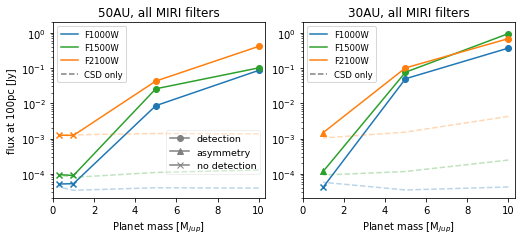

In [9]:
# mass vs mag, diff filters, in Jy
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7.2,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.flux1[i:12+i:3].values, data0_inc0.flux1anti[i:12+i:3], data5_inc0.flag[i:12+i:3].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.flux1[12+i::3].values, data0_inc0.flux1anti[12+i::3], data5_inc0.flag[12+i::3].values
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('flux at 100pc [Jy]')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all MIRI filters')
    plt.xlim((0,10.3))
    plt.ylim((2e-5,2))
    plt.yscale('log')
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8.5})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)
                       ]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=4, bbox_to_anchor=(1,0.11), prop={'size': 9.5},framealpha=0.3)
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/miri_mass_mag_filterlines_Jy.png', bbox_inches='tight', dpi=200)

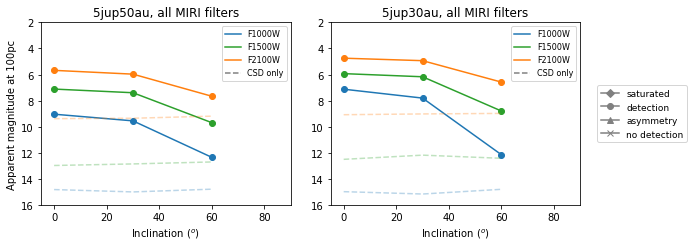

In [26]:
# inc vs mag, diff filters, 10jup
colors= ['tab:blue','tab:green','tab:orange','tab:red']
titles= ['5jup50au','5jup30au','5jup30au']
plt.figure(figsize=(10,3.8))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(3):
        if sub==0:
            x, y = [0,30,60], [data5_inc0.mag1[i+3],data5_inc30.mag1[i+3],data5_inc60.mag1[i+3]]
            y0 = [data0_inc0.mag1[i+3],data0_inc30.mag1[i+3],data0_inc60.mag1[i+3]]
            flags =  [data5_inc0.flag[i+3],data5_inc30.flag[i+3],data5_inc60.flag[i+3]]
        elif sub==1:
            x, y = [0,30,60], [data5_inc0.mag1[i+12+3],data5_inc30.mag1[i+12+3],data5_inc60.mag1[i+12+3]]
            y0 = [data0_inc0.mag1[i+12+3],data0_inc30.mag1[i+12+3],data0_inc60.mag1[i+12+3]]
            flags =  [data5_inc0.flag[i+12+3],data5_inc30.flag[i+12+3],data5_inc60.flag[i+12+3]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]                        
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y, label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all MIRI filters')
    plt.xlim((-5,90))
    plt.ylim((16,2))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,prop={'size': 8})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==1:
        legend2 = plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5),prop={'size': 9})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=2)
plt.savefig('../simtools/analysis_plots/miri_inc_mag_filterlines_5jup.png', bbox_inches='tight', dpi=200)

<Figure size 1080x288 with 0 Axes>

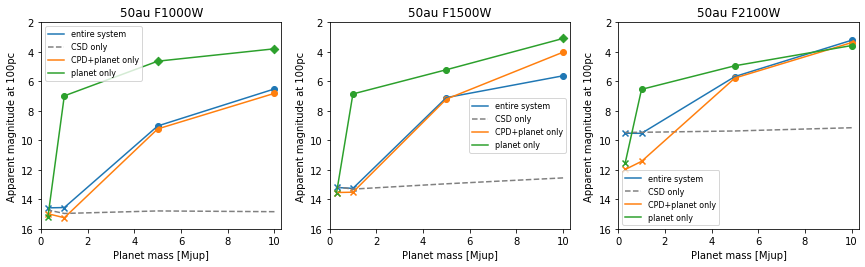

In [28]:
# mass vs magnitude diff cases 50au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(25,3.8))

for sub in range(3):
    plt.subplot(1,5,sub+1)
    x = [10,5,1,0.3]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[sub:12+sub:3].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[sub:12+sub:3].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((16,2))
plt.savefig('../simtools/analysis_plots/miri_mass_mag_cases_50au.png', bbox_inches='tight', dpi=200)

(16.0, 2.0)

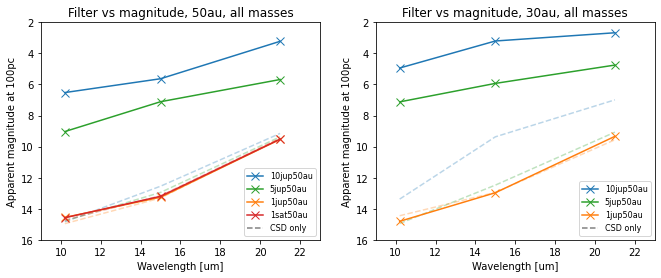

In [18]:
# filter vs mag, diff masses
colors= ['tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
for i in range(4):
    x, y = [10.2, 15, 21], data.mag1[3*i:3*i+3]
    plt.plot(x, y, marker='x', markersize=8,label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0.mag1[3*i:3*i+3], alpha=0.3, color=colors[i], linestyle='--')
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 50au, all masses')
plt.xlim((9,23))
plt.ylim((16,2))
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
#plt.axhline(y=i, color='gray', linestyle='--')
    
plt.subplot(1,2,2)
for i in range(3):
    x, y = [10.2, 15, 21], data.mag1[3*i+12:3*i+15]
    plt.plot(x, y, marker='x',markersize=8, label=data['model'][3*i], color=colors[i])
    plt.plot(x, data0.mag1[3*i+12:3*i+15], alpha=0.3, color=colors[i], linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 30au, all masses')
plt.xlim((9,23))
plt.ylim((16,2))

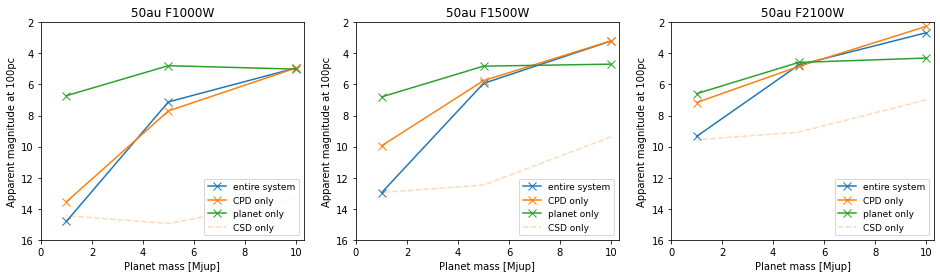

In [39]:
plt.figure(figsize=(16,4))
for j in range(3):
    plt.subplot(1,3,j+1)
    x = [10,5,1]
    plt.plot(x, data.mag1[12+j::3], marker='x',markersize=8, label='entire system')
    plt.plot(x, data1.mag1[12+j::3], marker='x',markersize=8, label='CPD only')
    plt.plot(x, data2.mag1[12+j::3], marker='x',markersize=8, label='planet only')
    plt.plot(x, data0.mag1[12+j::3], alpha=0.3, color=colors[i], linestyle='--', label='CSD only')

    plt.legend(loc=4,prop={'size': 9})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][j])
    plt.xlim((0,10.3))
    plt.ylim((16,2))

In [9]:
table=[datasets[0]['model'].values, datasets[0]['filter'].values]
for n in range(len(datasets)):
    col=[]
    for i in range(len(datasets[n])):
        if n > 8:
            a = datasets[n]['mag1anti'][i]
            col.append(f'{a:.2f}')
        else:
            a = datasets[n]['mag2'][i]
            if datasets[n]['flag'][i] == 'sat':
                col.append(f'<{a:.2f}')
            elif datasets[n]['flag'][i] == 'detect':
                col.append(f'{a:.2f}')
            else:
                col.append('/')
    table.append(col)
tabledf = pd.DataFrame.from_records(table).T
tabledf.columns=['model','filter','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$']
tabledf.to_csv(f'./flux_tables/{instru}_combined.csv')
tabledf

,model,filter,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$
0,10jup50au,F1000W,6.54,6.23,10.23,6.83,6.30,10.35,<3.81,<3.80,<3.88,14.87,15.15,14.71
1,10jup50au,F1500W,5.67,4.65,6.82,4.06,4.76,6.60,<3.12,<3.08,<3.15,12.87,12.66,12.57
2,10jup50au,F2100W,3.44,3.83,5.16,3.60,3.74,5.02,3.79,3.80,3.83,9.43,9.38,9.23
3,5jup50au,F1000W,9.04,9.55,12.45,9.25,9.19,12.39,<4.65,<4.59,<4.59,14.85,15.03,14.77
4,5jup50au,F1500W,7.16,7.44,9.81,7.26,7.21,9.56,5.27,5.16,5.36,13.04,12.91,12.77
5,5jup50au,F2100W,5.93,6.23,8.16,6.00,6.26,7.99,5.16,5.03,5.19,9.40,9.38,9.25
6,1jup50au,F1000W,/,/,/,/,/,/,7.00,7.00,7.00,15.03,14.75,14.73
7,1jup50au,F1500W,/,/,/,/,/,/,6.91,6.92,6.90,13.39,13.06,12.98
8,1jup50au,F2100W,/,/,/,/,/,/,6.77,6.77,6.78,9.50,9.50,9.38
9,1sat50au,F1000W,/,/,/,/,/,/,/,/,/,14.79,14.95,14.72
